# LAB5 KNN in Gait Disorders

Xochitl Alvarado, Nia Sanchez, Tiffany Nguyen, Hideki Nakazawa  

Due: 10/08/2020

In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from sklearn.model_selection import cross_val_score

### Cleaning Data

In [2]:
# load data
gait = pd.read_csv("gait.csv")

### rename column and index

In [3]:
#data.rename(columns={'x1':'stride length','x2':'gait speed[m/s]','x3':'age[years]','k':'class(Ck)'}, inplace=True)

In [4]:
gait

,x1,x2,x3,k
0,0.32,0.73,76,1
1,0.45,0.59,71,1
2,0.32,0.53,87,1
3,0.49,0.71,61,1
4,0.27,0.57,84,1
5,0.40,0.85,73,1
6,0.25,0.42,82,1
7,0.41,0.67,82,1
8,0.37,0.55,52,1
9,0.36,0.70,76,1


In [5]:
#data.describe()

In [6]:
#sns.lmplot('x1','x2',data=gait,
           #hue='k',palette='Set1',
           #fit_reg=False,scatter_kws={"s":70})
#plt.show()

k=1: Parkinson's disease,  
k=2: control set(age-matched),  
k=3: control set(students)  
N =51 individuals

In [7]:
display(gait)

,x1,x2,x3,k
0,0.32,0.73,76,1
1,0.45,0.59,71,1
2,0.32,0.53,87,1
3,0.49,0.71,61,1
4,0.27,0.57,84,1
5,0.40,0.85,73,1
6,0.25,0.42,82,1
7,0.41,0.67,82,1
8,0.37,0.55,52,1
9,0.36,0.70,76,1


### I need to convert dataframe to array for using sk-learn feature

In [8]:
data ={'Name':['Hideki','Savanah','Kate'],
       'Age': [24, 23, 24],
       'nationality': ['Japan','Syria','Philippines']}

df = pd.DataFrame(data)
display(df)

,Name,Age,nationality
0,Hideki,24,Japan
1,Savanah,23,Syria
2,Kate,24,Philippines


In [9]:
np_array = df.to_numpy()
display(np_array)

array([['Hideki', 24, 'Japan'],
       ['Savanah', 23, 'Syria'],
       ['Kate', 24, 'Philippines']], dtype=object)

In [10]:
df[['Age']].to_numpy()

array([[24],
       [23],
       [24]])

Convert gait datasets(data frame) into numpy array

In [33]:
gait_array = gait.to_numpy()
gait.k 

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
Name: k, dtype: int64

In [28]:
X=gait_array[:,:2] 
X

array([[0.32, 0.73],
       [0.45, 0.59],
       [0.32, 0.53],
       [0.49, 0.71],
       [0.27, 0.57],
       [0.4 , 0.85],
       [0.25, 0.42],
       [0.41, 0.67],
       [0.37, 0.55],
       [0.36, 0.7 ],
       [0.43, 0.67],
       [0.38, 0.53],
       [0.43, 0.61],
       [0.4 , 0.55],
       [0.35, 0.57],
       [0.38, 0.48],
       [0.37, 0.72],
       [0.49, 0.62],
       [0.67, 1.03],
       [0.6 , 0.88],
       [0.59, 0.95],
       [0.54, 0.77],
       [0.53, 0.77],
       [0.43, 0.67],
       [0.49, 0.62],
       [0.52, 0.85],
       [0.5 , 0.72],
       [0.54, 0.81],
       [0.54, 0.81],
       [0.56, 0.75],
       [0.49, 0.78],
       [0.6 , 0.97],
       [0.5 , 0.84],
       [0.52, 0.7 ],
       [0.59, 1.06],
       [0.46, 0.6 ],
       [0.69, 1.16],
       [0.64, 1.  ],
       [0.64, 1.  ],
       [0.56, 0.93],
       [0.61, 1.  ],
       [0.57, 0.93],
       [0.61, 1.  ],
       [0.64, 1.16],
       [0.58, 1.21],
       [0.6 , 0.83],
       [0.55, 0.9 ],
       [0.6 ,

#### From other article's summary using bayesian Prob

The results obtained prove that the proposed method is able
to classify sets of individuals with an accuracy sufficient for distinguishing between the class of Parkinson’s disease individuals
and the control sets. The proposed algorithm includes a Bayesian
classification of gait features into the selected class and the evaluation of the classification probability. This approach is valuable for
clinical practice and the proposal of the most probable diagnosis.
Bayesian methods provide a very useful mathematical tool in this
way

## Using Scikit-Learns KNeighborsClassifier Class for KNN

(x1 – stride length [m],
x2 – gait speed [m/s], x3 – age [years]

k-clusters are 1-3

and y-var is 0-2

so make k-1

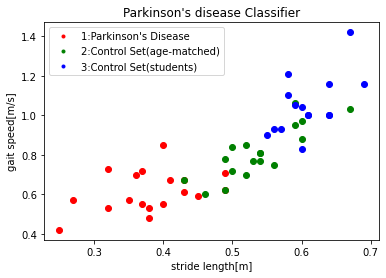

In [34]:
%matplotlib inline
from sklearn import svm, datasets

datasets=gait_array
X=gait_array[:,:2]  #take the first three features
y=gait.k # k = target (classes)
#display(X)
#display(y)
#---plot the points---#
colors=['red','green','blue']

for color, i, k in zip(colors,[1,2,3],gait.k):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=i+1)

plt.xlabel('stride length[m]')
plt.ylabel('gait speed[m/s]')

custom = [Line2D([], [], marker='.', color='r', linestyle='None'),
          Line2D([], [], marker='.', color='g', linestyle='None'),
          Line2D([], [], marker='.', color='b', linestyle='None')]

#plt.legend(custom, ['Yes', 'No'], loc='lower right')
plt.legend(custom,["1:Parkinson's Disease","2:Control Set(age-matched)",'3:Control Set(students)'], loc='best', shadow=False, scatterpoints=1)

plt.title("Parkinson's disease Classifier")
plt.show()


### Exploring Different Values of K
We can now use Scikit-learns KNeighborsClassifier class to help us train a model on gait dataset using KNN. For a start, lets use a k of 1:

k=23, 45, 3, 9  up to 51

Noticed that range was too small, giving an error  
knew that xx was the problem  
Because that's the line that was giving you an error  
So I looked at xx and saw that it was empty  
So I knew that x_min, x_max, and h were the problem  
I checked x_min, x_max and noticed that the gap was small  
And then I checked h and noticed it was negative  
So I made it positive and it worked

(array([0, 1, 2], dtype=int64), array([20, 16, 15], dtype=int64))


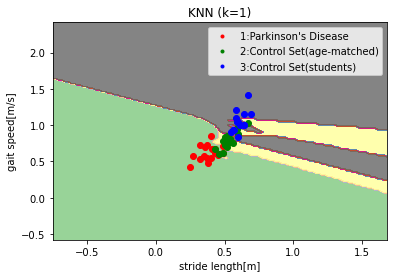

In [22]:
from sklearn.neighbors import KNeighborsClassifier

ck=1
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=ck)
#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,abs(h)),
                  np.arange(y_min,y_max,abs(h)))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw teh result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.8)

#---plot the training points---#
colors=['red','green','blue']
for color, i, k in zip(colors,[0,1,2],gait.k):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=i+1)

plt.xlabel('stride length[m]')
plt.ylabel('gait speed[m/s]')

custom = [Line2D([], [], marker='.', color='r', linestyle='None'),
          Line2D([], [], marker='.', color='g', linestyle='None'),
          Line2D([], [], marker='.', color='b', linestyle='None')]

plt.title(f'KNN (k={ck})')

plt.legend(custom,["1:Parkinson's Disease","2:Control Set(age-matched)",'3:Control Set(students)'], loc='best', shadow=False, scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


The preceding code meshgrid (a rectangular grid of values) of points scattered across the x- and y-axes. Each point is then sued for prediction, and the result is drawn using a color plot. In this figure, it shows the calssification boundary using a k of 1. Notice that for k=1, you perform your prediction based solely on a single sample-your nearest neighbor. This makes your prediction very sensitive to all sorts of distortions, such as outliers, mislabeling, and so on. In general, setting k=1 usually leads to overfitting and as a result your predictions are not very accurate.

For KNN, setting k to a higher value tends to make your prediction more robust against noise in your data. Using the same code snippet lets vary the values of k. 

(array([0, 1, 2], dtype=int64), array([19, 13, 19], dtype=int64))


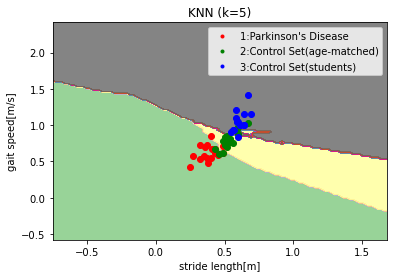

In [23]:
from sklearn.neighbors import KNeighborsClassifier

ck=5
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=ck)
#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,abs(h)),
                  np.arange(y_min,y_max,abs(h)))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw teh result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.8)

#---plot the training points---#
colors=['red','green','blue']
for color, i, k in zip(colors,[0,1,2],gait.k):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=i+1)

plt.xlabel('stride length[m]')
plt.ylabel('gait speed[m/s]')

custom = [Line2D([], [], marker='.', color='r', linestyle='None'),
          Line2D([], [], marker='.', color='g', linestyle='None'),
          Line2D([], [], marker='.', color='b', linestyle='None')]

plt.title(f'KNN (k={ck})')

plt.legend(custom,["1:Parkinson's Disease","2:Control Set(age-matched)",'3:Control Set(students)'], loc='best', shadow=False, scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


(array([0, 1, 2], dtype=int64), array([19, 18, 14], dtype=int64))


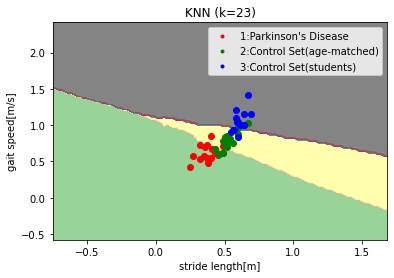

In [24]:
from sklearn.neighbors import KNeighborsClassifier

ck=23
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=ck)
#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,abs(h)),
                  np.arange(y_min,y_max,abs(h)))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw teh result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.8)

#---plot the training points---#
colors=['red','green','blue']
for color, i, k in zip(colors,[0,1,2],gait.k):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=i+1)

plt.xlabel('stride length[m]')
plt.ylabel('gait speed[m/s]')

custom = [Line2D([], [], marker='.', color='r', linestyle='None'),
          Line2D([], [], marker='.', color='g', linestyle='None'),
          Line2D([], [], marker='.', color='b', linestyle='None')]

plt.title(f'KNN (k={ck})')

plt.legend(custom,["1:Parkinson's Disease","2:Control Set(age-matched)",'3:Control Set(students)'], loc='best', shadow=False, scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


(array([0, 1], dtype=int64), array([19, 32], dtype=int64))


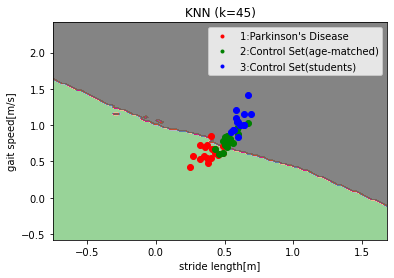

In [25]:
from sklearn.neighbors import KNeighborsClassifier

ck=45
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=ck)
#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,abs(h)),
                  np.arange(y_min,y_max,abs(h)))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw teh result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.8)

#---plot the training points---#
colors=['red','green','blue']
for color, i, k in zip(colors,[0,1,2],gait.k):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=i+1)

plt.xlabel('stride length[m]')
plt.ylabel('gait speed[m/s]')

custom = [Line2D([], [], marker='.', color='r', linestyle='None'),
          Line2D([], [], marker='.', color='g', linestyle='None'),
          Line2D([], [], marker='.', color='b', linestyle='None')]

plt.title(f'KNN (k={ck})')

plt.legend(custom,["1:Parkinson's Disease","2:Control Set(age-matched)",'3:Control Set(students)'], loc='best', shadow=False, scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


ote that as k increases, the boundary becomes smoother. But it also means that the more points will be classified incorrectly. When k increases to a large value, underfitting occurs. 

### Cross-Validation
We have witnessed from previous chapters, that we split our dataset into two individual sets--one for training ando ne for testing. However, the data in your dataset may not be distributed evenly, and as a result your test set may be too simple or too hard to predict, thereby making it very difficult to know if your model works well.

Instead of using part of the data for training and part for testing, you can split the data into k-folds and train the model k times, rotating the training and testing sets, By doing so, each data point is now being used for training and testing.

#### Parameter-Tuning K
Now that you understand cross-validation, lets use it on our Iris dataset. We will train the model using all of the three features, and as the same time we shall use cross-validation on the dataset using 10 folds. We will do this for each value of k:

In [27]:
#---holds the cv (cross-validates) scores---#
cv_scores=[]

#---use all features---#
X=gait_array[:,:3]  
y=gait.k-1 # k = target (classes)

#---number of folds---#
folds=10

#---creating odd list of K for KNN---#
ks=list(range(1,int(len(X)*((folds-1)/folds))))

#---remove all multiples of 3---#
ks=[ck for ck in ks if ck % 3 !=0]

#---perform k-fold cross-validation---#
for k in ks:
    knn=KNeighborsClassifier(n_neighbors=k)
    
    #---performs cross-validation and returns the average accuracy---#
    scores= cross_val_score(knn,X,y,cv=folds,scoring='accuracy')
    mean=scores.mean()
    cv_scores.append(mean)
    print(k,mean)
    

1 0.8800000000000001
2 0.8800000000000001
4 0.8033333333333333
5 0.7833333333333333
7 0.8033333333333333
8 0.7833333333333333
10 0.7833333333333333
11 0.8033333333333333
13 0.8033333333333333
14 0.7833333333333333
16 0.7833333333333333
17 0.7633333333333333
19 0.7833333333333333
20 0.7833333333333333
22 0.8033333333333333
23 0.7833333333333333
25 0.7433333333333333
26 0.7633333333333333
28 0.6233333333333333
29 0.5866666666666667
31 0.5700000000000001
32 0.55
34 0.49000000000000005
35 0.49000000000000005
37 0.49000000000000005
38 0.49000000000000005
40 0.49000000000000005
41 0.49000000000000005
43 0.49000000000000005
44 0.49000000000000005


The Scikit-learn library provides the cross_val_score() function that performs cross-validation for you automatically, and it reutnrs the metrics that you want (for example, accuracy). When using cross-validation, be aware that at any one time, there will be $((folds-1/folds)*total_rows$ available for training. This is because $(1/folds)*total_rows$ will be used for testing. 

For KNN, there are 3 rules yo which you must adhere:

The value of k cannot exceed the numbero f rows for training

The value of k should be an odd number (so you can avoid situations where there is a tie between classes) for a two class problem.

The value of k must not be a multiple of the number of classes (to avoid ties, similar to the previous point)

Hence, the ks list in the preceding code will contain the following values

In [29]:
print(ks)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44]


After training, the cv_scores will contain a list of accuracies based on the different values of k

### Finding the Optimal K
To find the optimal k, you simple find the value of k that gives the highest accuracy. Or in this case, you willw ant to find the lowest misclassification error (MSE).

The following code snippet finds the MSE for each k, and then finds the k with the lowest MSE. It then plots a line chart of MSE against k.

The optimal number of neighbors is 1


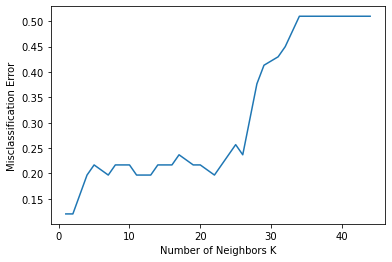

In [30]:
#---calculate misclassification error for each k---#
MSE=[1-x for x in cv_scores]

#---dtermining best k (min.MSE)---#
optimal_k=ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")

#---plot misclassification error vs k---#
plt.plot(ks,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()